In [33]:
from ROOT import TFile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
dataFile = TFile.Open("degALL_data_2017_mEllipsePre_treeFlat_DSelector.root")

In [35]:
N=50000
eventNums = np.zeros(N,dtype=int)
protonIDs = np.zeros(N,dtype=int)
beamIDs = np.zeros(N,dtype=int)
for ievent,event in enumerate(dataFile.degALL_data_2017_mEllipsePre_tree_flat):
    if ievent < N:
        eventNums[ievent] = event.event
        protonIDs[ievent] = event.protonID
        beamIDs[ievent] = event.beamID
    else:
        break

In [36]:
dataDict = {"eventNums":eventNums,
            "protonIDs":protonIDs,
            "beamIDs":beamIDs
           }

In [37]:
data=pd.DataFrame(dataDict)

In [38]:
uniqueProtonsPerEvent=data.groupby("eventNums")["protonIDs"].nunique()

In [39]:
uniqueCombosPerEvent=data.groupby('eventNums')['protonIDs'].count()

In [41]:
uniqueBeamsPerEvent=data.groupby("eventNums")["beamIDs"].nunique()

Text(0.5,0,'unique beam photons in event')

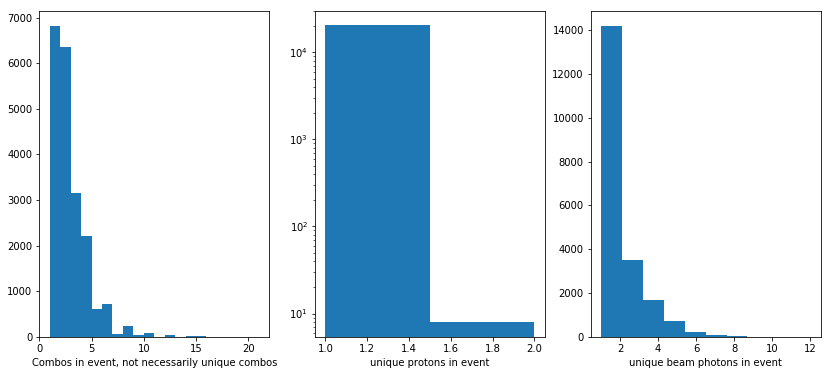

In [46]:
fig,ax = plt.subplots(1,3,figsize=(14,6))

ax[0].hist(uniqueCombosPerEvent,bins=20)
ax[0].set_xlabel("Combos in event, not necessarily unique combos")

ax[1].set_yscale("log")
ax[1].hist(uniqueProtonsPerEvent,bins=2)
ax[1].set_xlabel("unique protons in event")

ax[2].hist(uniqueBeamsPerEvent,bins=10)
ax[2].set_xlabel("unique beam photons in event")